In [ ]:
# imHandwritten Digit Classification

In [ ]:
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
xtrain.shape         # total 6000 images of 28*28

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(xtrain[0],cmap='gray')
plt.show()

In [ ]:
plt.imshow(xtrain[1],cmap='gray')
plt.show()

In [ ]:
plt.imshow(xtrain[4],cmap='gray')
plt.show()

In [ ]:
plt.imshow(xtrain[10],cmap='gray')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot=True ,fmt='d')
plt.show()

In [ ]:
# view first 9 imagesfrom train data

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'Number : {ytrain[i]}')

In [ ]:
# preprocessing the data

In [ ]:
## pixel values are between 0-255 ,so divide xtrain and xtest by 255 to scale it in range 0-1

In [ ]:
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [ ]:
# check how many unique vlues are in output training data

In [ ]:
import numpy as np

In [ ]:
np.unique(ytrain)

In [ ]:
# for multiclass classification apply one hot encoding on y feature

In [ ]:
from keras.utils import to_categorical
ytrain_cat= to_categorical(ytrain)
ytest_cat= to_categorical(ytest)

In [ ]:
ytrain_cat[0:3]

In [ ]:
ytrain[0:3]

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D, MaxPool2D, Flatten,Dropout, Dense

In [ ]:
# initialize the model
model =Sequential()

In [ ]:
# Add input layer
model.add(Input(shape=(28,28,1)))


In [ ]:

# Add convolution layer 1
model.add(Convolution2D(filters=32,activation='relu',kernel_size=(3,3)))

# we don't have to worry about the values in filter matrix



# Add maxpooling layer

model.add(MaxPool2D(pool_size=(2,2)))

#Add convolution layer2

model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

# Add Max Pooling layer2

model.add(MaxPool2D(pool_size=(2,2 )))


# Add a flatten layer

model.add(Flatten())

# Add dropout layer

model.add(Dropout(0.5))

# create a output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))




In [ ]:
# compile and fit the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [105]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=15)

Epoch 1/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6514 - accuracy: 0.8863 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 2/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1392 - accuracy: 0.9578 - val_loss: 0.0594 - val_accuracy: 0.9827
Epoch 3/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1133 - accuracy: 0.9667 - val_loss: 0.0536 - val_accuracy: 0.9843
Epoch 4/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1038 - accuracy: 0.9694 - val_loss: 0.0495 - val_accuracy: 0.9865
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0939 - accuracy: 0.9718 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0870 - accuracy: 0.9743 - val_loss: 0.0486 - val_accuracy: 0.9863
Epoch 7/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.0437 - val_accuracy:

In [106]:
# plt learning curve

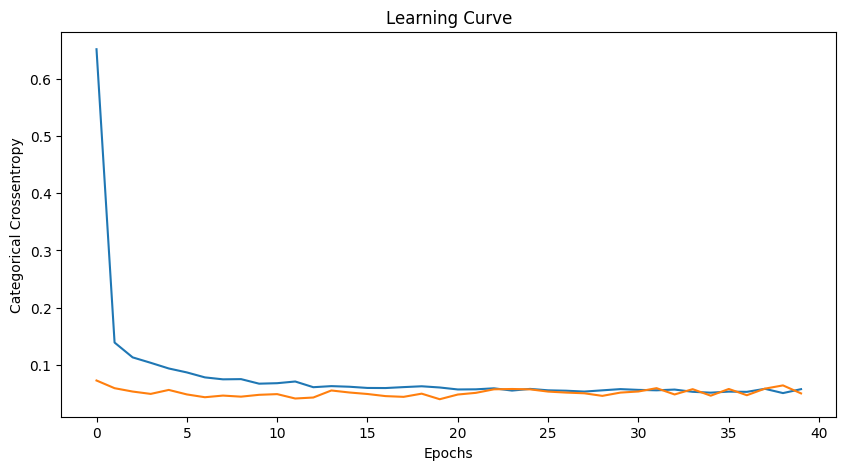

In [107]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

In [108]:
# model Evlutaion

In [118]:
model.evaluate(xtrain,ytrain_cat)


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0167 - accuracy: 0.9958


[0.0167160015553236, 0.9957833290100098]

In [112]:
# predict probalities for training and testing

In [113]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)


313/313 [==============================] - 1s 2ms/step


In [114]:
yprob_train[:5]

array([[2.29646805e-16, 1.49730097e-17, 5.20010806e-15, 9.93711274e-06,
        4.30709875e-21, 9.99990106e-01, 1.41244015e-16, 2.46550436e-12,
        1.15902665e-08, 1.13562459e-09],
       [1.00000000e+00, 1.16097360e-20, 1.99626999e-11, 3.61617695e-19,
        1.44984764e-18, 1.04503972e-17, 2.97598995e-14, 6.50532729e-19,
        1.81788026e-12, 1.52315834e-11],
       [4.10023708e-23, 2.31739732e-11, 1.16070579e-16, 2.76058936e-18,
        1.00000000e+00, 2.62947805e-15, 8.66176285e-19, 9.21073356e-11,
        1.87681251e-13, 5.45116556e-11],
       [7.91054201e-12, 9.99999404e-01, 1.64846664e-10, 3.65989765e-15,
        3.25113547e-07, 2.65419495e-13, 1.03868075e-12, 5.49320234e-08,
        2.80037227e-07, 2.72954576e-10],
       [2.93945310e-18, 3.69230539e-14, 3.81486032e-12, 2.50093614e-15,
        1.94285249e-07, 2.79055852e-16, 1.32485926e-19, 1.14909957e-10,
        3.69386835e-05, 9.99962807e-01]], dtype=float32)

In [115]:
# give final prediction

In [116]:
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

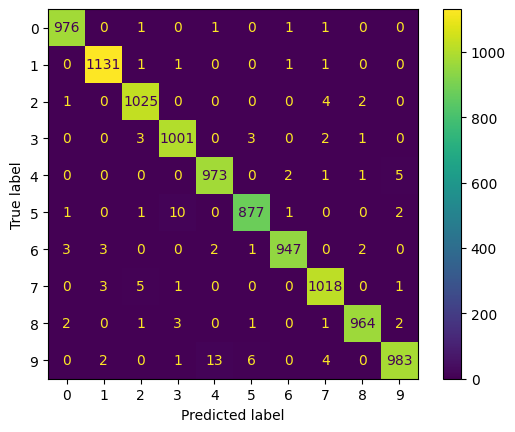

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [119]:
# notes 1 probability is high